In [1]:
cd .. 

/home/jovyan/2018-W-450-4/06-hyper-parameter-tuning


In [2]:
run __init__.py

In [3]:
run src/load_data.py

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
from sklearn.metrics import accuracy_score, f1_score

In [8]:
!conda install tqdm --yes

Fetching package metadata ...............
Solving package specifications: .

# All requested packages already installed.
# packages in environment at /opt/conda:
#
tqdm                      4.19.6                     py_0    conda-forge


In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from tqdm import tqdm 
from time import time

In [10]:
adult_train_df = data['adult']['train']['engineered']
adult_train_target = data['adult']['train']['labels']

In [11]:
from time import time

In [12]:
def time_function_call(function):
    def wrapper(*args, **kwargs):
        start = time()
        result = function(*args, **kwargs)
        execution_time = time() - start
        return result, execution_time
    return wrapper

@time_function_call
def model_fit(model, X, y):
    return model.fit(X, y)

@time_function_call
def model_predict(model, X):
    return model.predict(X)

def run_model(model, model_name, data, labels):

    X_train, X_test, y_train, y_test = train_test_split(data, labels, stratify=labels)
    
    _, fit_time = model_fit(model, X_train, y_train)
    
    train_pred, train_pred_time = model_predict(model, X_train)
    
    test_pred, test_pred_time = model_predict(model, X_test)   
    
    return {
            'model' : model,
            'model_name' : model_name,
            'f1_train_score' : f1_score(y_train, train_pred),
            'f1_test_score' : f1_score(y_test, test_pred),
            'accuracy_train_score' : model.score(X_train, y_train),
            'accuracy_test_score' : model.score(X_test, y_test),
            'fit_time' : fit_time,
            'train_pred_time' : train_pred_time,
            'test_pred_time' : test_pred_time}

## F$_1$ Score by Penalty Type and C Value

In [13]:
test_results = []
c_values = np.logspace(-4,4,9)
for regularization_type in ['l1', 'l2']:
    for c in tqdm(c_values):
        model = LogisticRegression(penalty=regularization_type, C=c)
        test_result = run_model(model, 
                                regularization_type, 
                                adult_train_df, 
                                adult_train_target)
        test_results.append(test_result)

100%|██████████| 9/9 [00:02<00:00,  4.43it/s]


In [14]:
test_results_df = pd.DataFrame(test_results)

In [15]:
test_results_df

,accuracy_test_score,accuracy_train_score,f1_test_score,f1_train_score,fit_time,model,model_name,test_pred_time,train_pred_time
0,0.795310,0.795511,0.382282,0.376318,0.065480,"LogisticRegression(C=0.0001, class_weight=None...",l1,0.003706,0.012528
1,0.808232,0.802957,0.418762,0.398050,0.073908,"LogisticRegression(C=0.001, class_weight=None,...",l1,0.003829,0.012441
2,0.829451,0.838164,0.561346,0.592255,0.191860,"LogisticRegression(C=0.01, class_weight=None, ...",l1,0.004043,0.012821
3,0.844448,0.850396,0.635786,0.649994,0.594729,"LogisticRegression(C=0.10000000000000001, clas...",l1,0.003928,0.012613
4,0.846362,0.852470,0.650707,0.663104,1.518505,"LogisticRegression(C=1.0, class_weight=None, d...",l1,0.004191,0.013094
5,0.848756,0.853055,0.655022,0.661936,0.176328,"LogisticRegression(C=10.0, class_weight=None, ...",l1,0.004046,0.012468
6,0.851149,0.852204,0.657866,0.661799,0.202486,"LogisticRegression(C=100.0, class_weight=None,...",l1,0.004089,0.012501
7,0.853063,0.850343,0.662761,0.656326,0.170495,"LogisticRegression(C=1000.0, class_weight=None...",l1,0.003798,0.012616
8,0.849872,0.853109,0.655941,0.663827,0.193567,"LogisticRegression(C=10000.0, class_weight=Non...",l1,0.003831,0.011734
9,0.802010,0.805776,0.400773,0.413239,0.108963,"LogisticRegression(C=0.0001, class_weight=None...",l2,0.003799,0.012503


In [16]:
test_results_df['C'] = test_results_df.model.apply(lambda model: model.C)

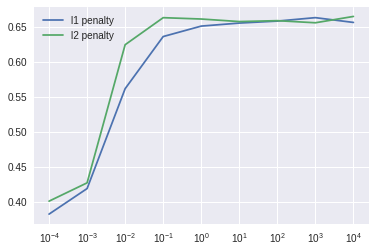

In [17]:
l1_test_results = test_results_df[test_results_df.model_name == 'l1']
l2_test_results = test_results_df[test_results_df.model_name == 'l2']
plt.plot(l1_test_results.C, l1_test_results.f1_test_score, label='l1 penalty')
plt.plot(l2_test_results.C, l2_test_results.f1_test_score, label='l2 penalty')
plt.xscale('log')
plt.legend()

In [18]:
test_results = []
c_values = np.logspace(-1,5,12)
for regularization_type in ['l1', 'l2']:
    for c in tqdm(c_values):
        model = LogisticRegression(penalty=regularization_type, C=c)
        test_result = run_model(model, 
                                regularization_type, 
                                adult_train_df, 
                                adult_train_target)
        test_results.append(test_result)

100%|██████████| 12/12 [00:02<00:00,  4.29it/s]


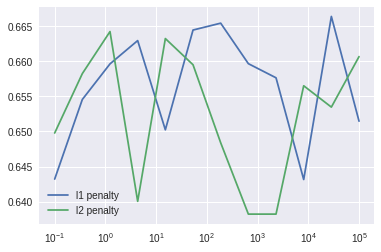

In [19]:
test_results_df = pd.DataFrame(test_results)

test_results_df['C'] = test_results_df.model.apply(lambda model: model.C)

l1_test_results = test_results_df[test_results_df.model_name == 'l1']
l2_test_results = test_results_df[test_results_df.model_name == 'l2']
plt.plot(l1_test_results.C, l1_test_results.f1_test_score, label='l1 penalty')
plt.plot(l2_test_results.C, l2_test_results.f1_test_score, label='l2 penalty')
plt.xscale('log')
plt.legend()

In [20]:
test_results = []
c_values = np.logspace(-1,5,12)
for regularization_type in ['l1', 'l2']:
    for c in tqdm(c_values):
        model = LogisticRegression(penalty=regularization_type, C=c)
        test_result = run_model(model, 
                                regularization_type, 
                                adult_train_df, 
                                adult_train_target)
        test_results.append(test_result)

100%|██████████| 12/12 [00:02<00:00,  4.02it/s]


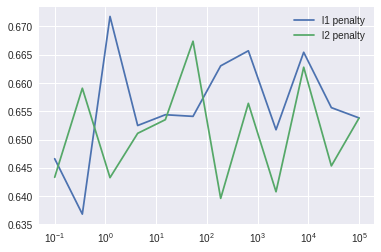

In [21]:
test_results_df = pd.DataFrame(test_results)

test_results_df['C'] = test_results_df.model.apply(lambda model: model.C)

l1_test_results = test_results_df[test_results_df.model_name == 'l1']
l2_test_results = test_results_df[test_results_df.model_name == 'l2']
plt.plot(l1_test_results.C, l1_test_results.f1_test_score, label='l1 penalty')
plt.plot(l2_test_results.C, l2_test_results.f1_test_score, label='l2 penalty')
plt.xscale('log')
plt.legend()

In [22]:
test_results = []
c_values = np.logspace(-1,5,12)

for _ in range(10):
    for regularization_type in ['l1', 'l2']:
        for c in tqdm(c_values):
            model = LogisticRegression(penalty=regularization_type, C=c)
            test_result = run_model(model, 
                                    regularization_type, 
                                    adult_train_df, 
                                    adult_train_target)
            test_results.append(test_result)

100%|██████████| 12/12 [00:03<00:00,  3.50it/s]


In [23]:
test_results_df = pd.DataFrame(test_results)
test_results_df['C'] = test_results_df.model.apply(lambda model: model.C)
l1_test_results = test_results_df[test_results_df.model_name == 'l1']
l2_test_results = test_results_df[test_results_df.model_name == 'l2']

In [24]:
from matplotlib.cm import viridis_r

In [25]:
k = int(len(viridis_r.colors)/12)
colors = [col for i, col in enumerate(viridis_r.colors) if i % 21 == 0]

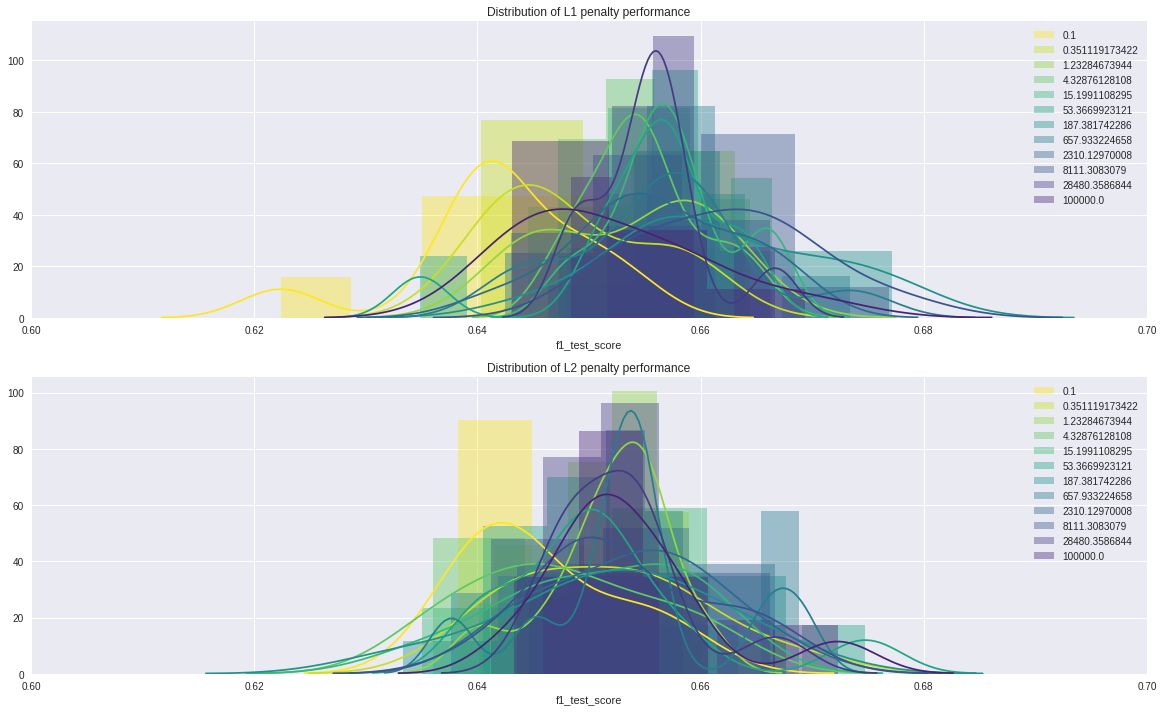

In [26]:
fig, (ax1, ax2) = plt.subplots(2,1,figsize=(20,12))
for i, C in enumerate(l1_test_results.C.unique()): 
    l1_test_results_for_C = l1_test_results[l1_test_results.C == C]
    sns.distplot(l1_test_results_for_C.f1_test_score, label=str(C), ax=ax1, color=colors[i])
    l2_test_results_for_C = l2_test_results[l2_test_results.C == C]
    sns.distplot(l2_test_results_for_C.f1_test_score, label=str(C), ax=ax2, color=colors[i])
ax1.set_xlim(0.6,0.7)
ax1.set_title('Distribution of L1 penalty performance')
ax1.legend()
ax2.set_xlim(0.6,0.7)
ax2.set_title('Distribution of L2 penalty performance')
ax2.legend()
